In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_answer = pd.read_csv('gender_submission.csv')
df_test = df_test.merge(df_test_answer, on='PassengerId')
df = pd.concat([df,df_test], axis=0)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


## Tratamento de Valores Faltantes

In [6]:
df['Age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

<AxesSubplot:>

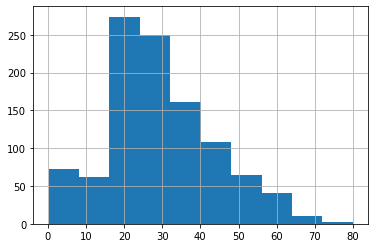

In [7]:
df['Age'].hist()

In [8]:
# Não existe um valor mais predominante entre as idades e o valor da média está bem próximo ao da mediana
# Por isso, iremos substituir os valores faltantes pela média
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F33                4
B96 B98            4
                  ..
D56                1
E45                1
C49                1
D38                1
A10                1
Name: Cabin, Length: 186, dtype: int64

In [10]:
# Temos muitos valores faltantes para a coluna de cabines e não existe um valor que se predomina sob os outros
# Logo iremos excluir essa coluna
df.drop(columns=['Cabin'], inplace=True)

In [11]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
# Como a maioria dos valores da coluna Embarked é 'S', iremos substituir os valores faltantes por esse valor
df['Embarked'].fillna('S', inplace=True)

In [13]:
df['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [14]:
# Não existe um valor mais predominante entre as idades, porém o valor da média está bem distante da mediana
# Por isso, iremos substituir os valores faltantes pela mediana
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 122.7+ KB


## Transformação e Normalização de dados

In [16]:
# Vamos remover as colunas PassengerId, Name e Ticket pois temos (quase) um valor para cada passageiro
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [17]:
# Vamos criar dummies para as duas colunas qualitativas: Sex e Embarked

df = pd.get_dummies(df)

In [18]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,29.881138,0,0,8.0500,0,1,0,0,1
414,1,1,39.000000,0,0,108.9000,1,0,1,0,0
415,0,3,38.500000,0,0,7.2500,0,1,0,0,1
416,0,3,29.881138,0,0,8.0500,0,1,0,0,1


In [19]:
# Apesar da coluna Pclass ser de números, por cada número ser uma categoria diferente, também vamos criar dummies
dummies_pclass = pd.get_dummies(df['Pclass'], prefix='Pclass')

In [20]:
df = df.merge(dummies_pclass, left_index=True, right_index=True)

In [21]:
df.drop(columns=['Pclass'], inplace=True)

In [22]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
0,0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
0,0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0


In [23]:
# Agora só falta normalizar as colunas restantes
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [24]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.273456,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.273456,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.430039,0.000,0.0,0.015282,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.430039,0.000,0.0,0.015282,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.473882,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Correlação entre as colunas

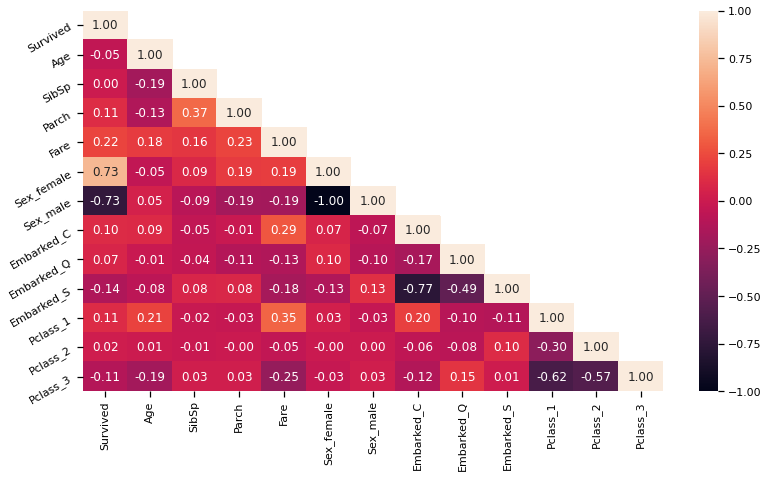

In [25]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

#create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [26]:
# Podemos ver que existe uma alta correlação entre as colunas Sex_female e Sex_male, já que quando o valor é 1
# numa das duas colunas, obrigatoriamente vai ser 0 na outra. Então vamos remover uma das colunas e manter só a outra.
df.drop(columns=['Sex_male'], inplace=True)

In [27]:
# Também existe uma alta correlação entre as colunas Embarked_C e Embarked_S (por motivos semelhantes ao caso anterior)
# Como existe uma maior correlação entre Embarked_S com a variável resposta, é essa a coluna que vamos manter
df.drop(columns=['Embarked_C'], inplace=True)

In [28]:
# Temos outro caso semelhante com as colunas Pclass_1, Pclass_2, Pclass_3.
# Vamos remover a coluna Pclass_2, pois ela é que possui menor correlação com a variável resposta
df.drop(columns=['Pclass_2'], inplace=True)

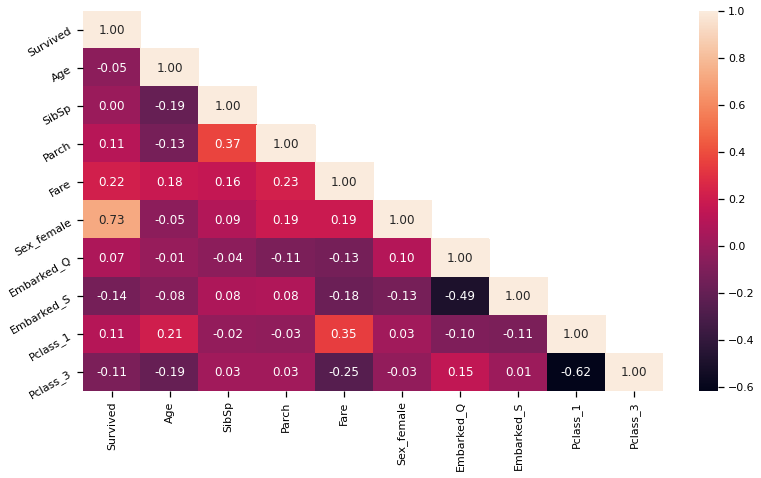

In [29]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

#create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Agora vamos testar diferentes modelos

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),
                                                    df['Survived'],
                                                    test_size=0.3,
                                                    random_state=42)

### Logistic Regression

In [31]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = logit.predict(X_test)

In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [34]:
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This functions prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
        
    fmt='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt)),
        horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black'
        
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    plt.tight_layout()

In [35]:
cnf_matrix

array([[370,  33],
       [ 47, 194]])

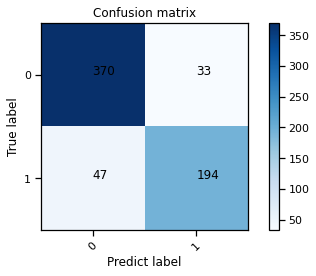

In [36]:
plot_confusion_matrix(cnf_matrix, classes=['0', '1'])

### SGD Classifier

In [37]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [38]:
y_pred = clf.predict(X_test)

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [40]:
cnf_matrix

array([[370,  33],
       [ 47, 194]])

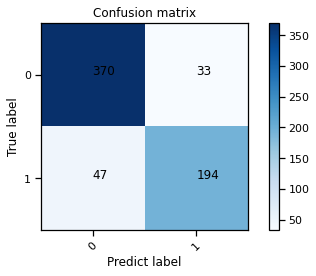

In [41]:
plot_confusion_matrix(cnf_matrix, classes=['0', '1'])